In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# Original dataframe
attrs = ["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar",
         "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege",
         "xegvy", "y-ege", "yegvx"]
df = pd.read_csv("data/letter-recognition.data", names=attrs)
letters = list(df["letter"])

# Represent letter with number
# A = 0, ...,  Z = 25
df["letter"] = df["letter"].apply(lambda letter: ord(letter) - 65)

df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df_pred = df.drop("letter", axis=1)
pca = PCA(n_components="mle").fit(df_pred)
pca.explained_variance_ratio_

array([0.28676168, 0.1506864 , 0.12506651, 0.08751311, 0.07601489,
       0.05613688, 0.05076389, 0.03927907, 0.03150354, 0.02366307,
       0.01754998, 0.01606569, 0.01491614, 0.012395  , 0.00803758])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

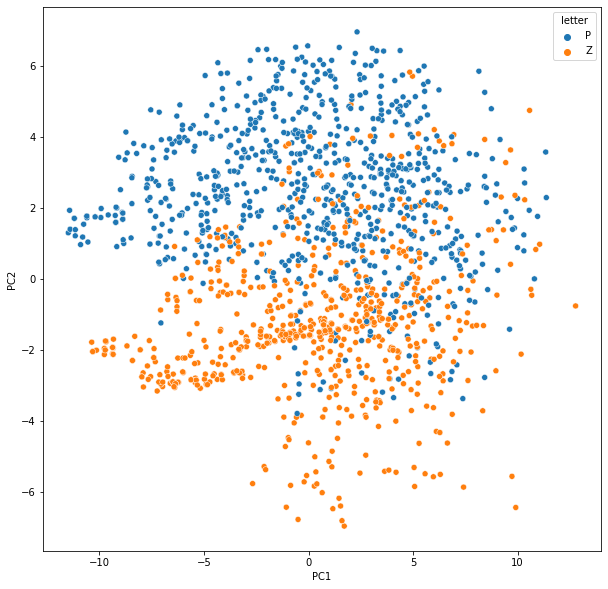

In [25]:
pca_PC2 = PCA(n_components=2).fit_transform(df_pred)
df_PC2 = pd.DataFrame(pca_PC2, columns=["PC1", "PC2"])
df_PC2["letter"] = letters
sns.scatterplot(x="PC1", y="PC2", hue="letter", data=df_PC2.loc[(df_PC2["letter"] == "P") | (df_PC2["letter"] == "Z")])

In [21]:
df_PC2.loc[(df_PC2["letter"] == "O") | (df_PC2["letter"] == "Q")]

,PC1,PC2,letter
11,5.376507,0.762016,O
16,-4.425152,-1.918391,O
23,5.911888,-2.166628,O
36,-0.570028,-1.456567,O
55,6.644333,-2.448002,Q
...,...,...,...
19958,1.053812,-1.942823,O
19961,-0.836872,-4.648338,O
19967,-1.796096,0.273051,Q
19986,9.006221,1.255375,O


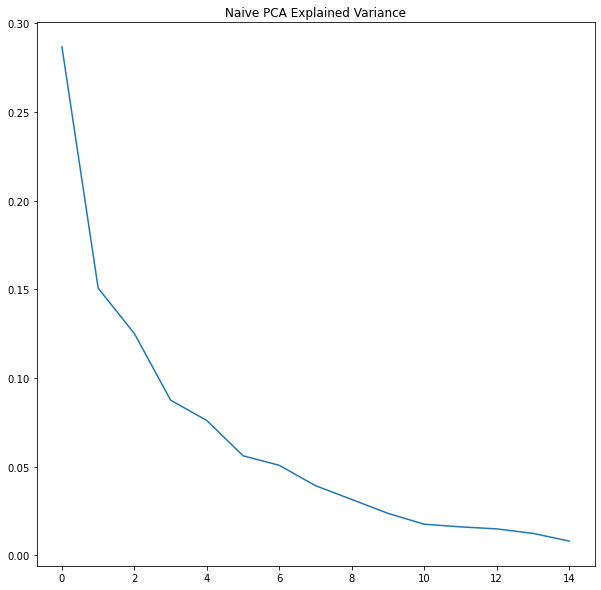

In [4]:
sns.lineplot(data=pca.explained_variance_ratio_)
plt.title("Naive PCA Explained Variance")
plt.show()

In [5]:
corr_mtx = df.corr()

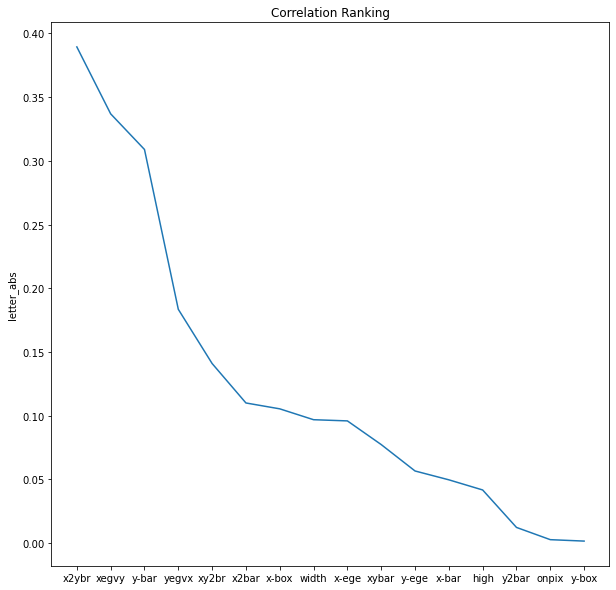

In [6]:
corr_mtx["letter_abs"] = corr_mtx["letter"].apply(lambda x: abs(x))
corr_rank = corr_mtx["letter_abs"].sort_values(ascending=False)
corr_rank = corr_rank.drop("letter")

sns.lineplot(data=corr_rank)
plt.title("Correlation Ranking")
plt.show()

In [ ]:
pca = PCA(n_components="mle").fit(df_pred)
pca.explained_variance_ratio_